In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# data_file = '1_deployed_stateOff.csv'
data_file = '2_deployed_stateStartUp.csv'

df = pd.read_csv('./data_ArduinoNano_raw/' + data_file,
                header=None)

df.columns = ['unix_time', 'sensor_data']

print(df.shape)
display(df.head(3))

(3117, 2)


,unix_time,sensor_data
0,1.682921e+09,"0,0.000000,0.000000,0.000000,0.000000,0.000000..."
1,1.682921e+09,"5,0.071777,-0.055786,0.996338,-1.770020,-2.929..."
2,1.682921e+09,"11,0.073242,-0.054810,0.996094,0.061035,-0.183..."


In [4]:
#df['datetime'] = pd.to_datetime(df['unix_datetime'])

df['datetime'] = np.nan
for i in range(0, df.shape[0]):
    df['datetime'][i] = datetime.datetime.fromtimestamp(df['unix_time'][i])
    
df = df[['datetime', 'unix_time','sensor_data']]

df = df.sort_values(by='datetime')
df = df.reset_index(drop=True)

In [5]:
display(df.head(3))
display(df.tail(3))

,datetime,unix_time,sensor_data
0,2023-04-30 23:07:05.236017,1.682921e+09,"0,0.000000,0.000000,0.000000,0.000000,0.000000..."
1,2023-04-30 23:07:05.265454,1.682921e+09,"5,0.071777,-0.055786,0.996338,-1.770020,-2.929..."
2,2023-04-30 23:07:05.283522,1.682921e+09,"11,0.073242,-0.054810,0.996094,0.061035,-0.183..."


,datetime,unix_time,sensor_data
3114,2023-04-30 23:08:41.681081,1.682921e+09,"10,0.085327,-0.047974,1.003052,0.488281,0.3051..."
3115,2023-04-30 23:08:41.705375,1.682921e+09,"12,0.084717,-0.048828,1.003418,0.549316,0.0610..."
3116,2023-04-30 23:08:41.732101,1.682921e+09,"15,0.085449,-0.048828,1.002686,0.244141,0.0000..."


In [6]:
df['meas_num'] = np.nan

df['microp'] = np.nan

df['accel_x'] = np.nan
df['accel_y'] = np.nan
df['accel_z'] = np.nan

df['gyro_x'] = np.nan
df['gyro_y'] = np.nan
df['gyro_z'] = np.nan

df['mag_x'] = np.nan
df['mag_y'] = np.nan
df['mag_z'] = np.nan

In [7]:
str_split = []
str_split = df['sensor_data'][0].split(",")
print(len(str_split))
str_split

11


['0',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '']

In [8]:
# i = 3
correct_splitstr_len = 11

for i in range(0, df.shape[0]):

    str_split = []
    str_split = df['sensor_data'][i].split(",")

    if len(str_split) == correct_splitstr_len:
        for meas in str_split:
            df['meas_num'][i] = i
            
            df['microp'][i] = str_split[0]

            df['accel_x'][i] = str_split[0]
            df['accel_y'][i] = str_split[1]
            df['accel_z'][i] = str_split[2]

            df['gyro_x'][i] = str_split[3]
            df['gyro_y'][i] = str_split[4]
            df['gyro_z'][i] = str_split[5]

            df['mag_x'][i] = str_split[6]
            df['mag_y'][i] = str_split[7]
            df['mag_z'][i] = str_split[8]

    else:
        print("skipping. split string length is wrong: " +
              str(correct_splitstr_len) + ', ' +
              str(len(str_split)))
    
df = df[['datetime', 'meas_num', 'microp', 'accel_x', 'accel_y',
       'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z']]

skipping. split string length is wrong: 11, 10


In [9]:
df['mag_x'] = df['mag_x'].astype(float)
df['mag_y'] = df['mag_y'].astype(float)
df['mag_z'] = df['mag_z'].astype(float)

In [10]:
#str_split

In [11]:
print(df.shape)
display(df.head())
display(df.tail())

(3117, 12)


,datetime,meas_num,microp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,2023-04-30 23:07:05.236017,0.0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-04-30 23:07:05.265454,1.0,5,5,0.071777,-0.055786,0.996338,-1.770020,-2.929688,1.159668,9.851074,11.718750
2,2023-04-30 23:07:05.283522,2.0,11,11,0.073242,-0.054810,0.996094,0.061035,-0.183105,-0.549316,9.680176,11.157227
3,2023-04-30 23:07:05.298179,3.0,11,11,0.077759,-0.056641,0.987549,0.549316,0.183105,-0.671387,9.680176,11.157227
4,2023-04-30 23:07:05.309910,4.0,11,11,0.078369,-0.063354,0.988770,0.427246,0.488281,-0.610352,9.680176,11.157227


,datetime,meas_num,microp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
3112,2023-04-30 23:08:41.627630,3112.0,9,9,0.084717,-0.048462,1.001221,0.305176,0.427246,-0.549316,10.083008,13.757324
3113,2023-04-30 23:08:41.651175,3113.0,11,11,0.085083,-0.048706,1.003906,0.732422,0.183105,-0.305176,10.083008,13.757324
3114,2023-04-30 23:08:41.681081,3114.0,10,10,0.085327,-0.047974,1.003052,0.488281,0.305176,-0.488281,9.814453,13.293457
3115,2023-04-30 23:08:41.705375,3115.0,12,12,0.084717,-0.048828,1.003418,0.549316,0.061035,-0.488281,9.814453,13.293457
3116,2023-04-30 23:08:41.732101,3116.0,15,15,0.085449,-0.048828,1.002686,0.244141,0.000000,-0.366211,9.814453,13.293457


In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])
type(df['mag_x'][0])

numpy.float64

<Figure size 1440x4320 with 0 Axes>

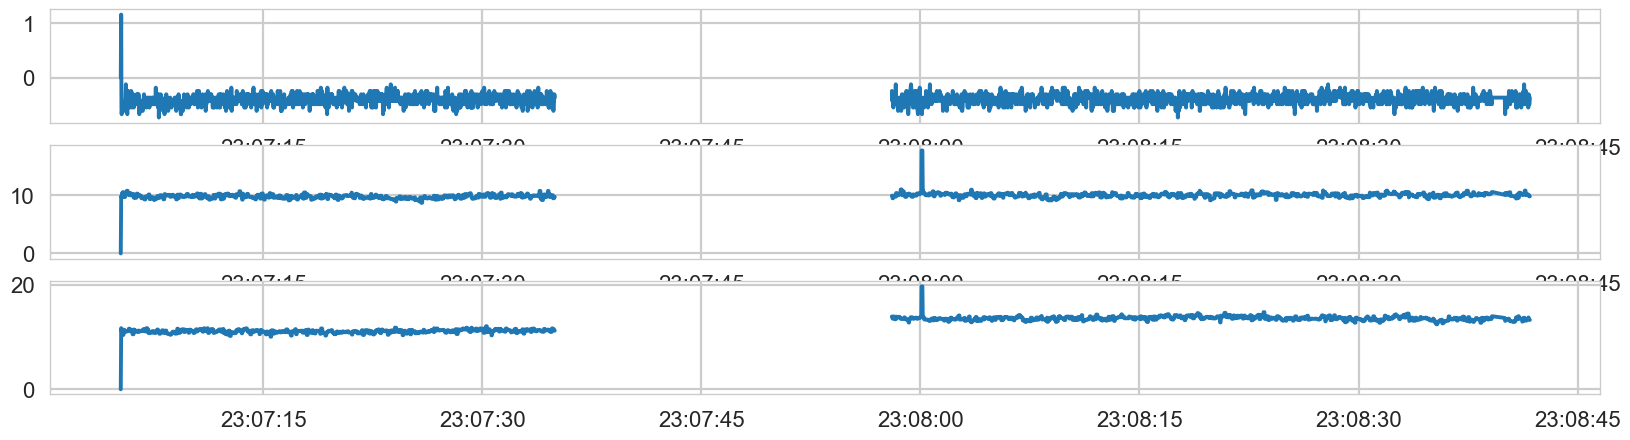

In [13]:
plt.figure(figsize=(20,60))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')

# plt.plot(df['datetime'], df['microp'])
plt.figure(figsize=(20,5))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')

# plt.plot(df['datetime'], df['microp']);

plt.subplot(3,1,1)
plt.plot(df['datetime'], df['mag_x'])
#plt.plot(df['mag_x'])

plt.subplot(3,1,2)
plt.plot(df['datetime'], df['mag_y']);
#plt.plot(df['mag_y']);

plt.subplot(3,1,3)
plt.plot(df['datetime'], df['mag_z']);
#plt.plot(df['mag_z']);


In [14]:
# df.to_csv('data_parsed_1_deployed_stateOff.csv')
df.to_csv('data_parsed_' + data_file)